In [10]:
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from collections import Counter

In [4]:
# Select Timeframe
today = date.today()
day = today.day-2
month = today.month
year = today.year

prev_day = 1
if month < 5:
    prev_month = month+6
    prev_year = year-1
else:
    prev_month = month-6
    prev_year = year
   
print('From:',(prev_day, prev_month, prev_year), 'To:', (day, month, year))

From: (1, 7, 2021) To: (28, 1, 2022)


In [12]:
all_stocks_df = pd.read_csv('New_Screen_1_26_2022.csv')
subsectors = all_stocks_df['Sub-Sector'].unique()
print(len(subsectors), all_stocks_df.shape[0])

136 4329


In [25]:
all_stocks_df.head()

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Net Profit Margin,5Y Avg Net Profit Margin,5Y Avg Return on Equity,...,6M Return vs Nifty,Debt to Equity,PB Ratio,Fundamental Score,Value Momentum Rank,Price to Intrinsic Value Rank,Earnings Quality Rank,Price Momentum Rank,Beta,Alpha
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.605541e+06,2373.25,32.680782,7.793277,9.725370,8.300577,10.627669,...,3.738434,33.855037,2.008353,5.593750,77.0,62.0,3.0,97.0,1.161611,11.546318
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.394505e+06,3769.90,43.000474,37.740680,19.383065,20.433589,34.788399,...,8.370634,8.948661,16.008924,6.761957,51.0,35.0,67.0,79.0,0.635544,14.403774
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.240033e+05,1488.05,25.885029,16.435200,20.420916,18.588574,17.295561,...,-5.827718,NaN,3.915566,8.128571,63.0,52.0,52.0,47.0,1.096553,-4.207789
3,Infosys Ltd,INFY,IT Services & Consulting,7.213736e+05,1722.15,37.278361,27.135305,18.847214,19.271149,24.421902,...,-0.686880,6.935219,9.395087,5.870652,71.0,44.0,96.0,97.0,0.635091,19.306729
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.544546e+05,801.65,30.159118,12.382897,11.395012,7.297748,8.053466,...,9.505806,NaN,3.316595,4.697143,75.0,63.0,88.0,92.0,1.333348,6.496518


In [26]:
all_stocks_df.columns

Index(['Name', 'Ticker', 'Sub-Sector', 'Market Cap', 'Close Price', 'PE Ratio',
       'Return on Equity', 'Net Profit Margin', '5Y Avg Net Profit Margin',
       '5Y Avg Return on Equity', 'ROCE', '1D Return', '1M Return vs Nifty',
       '1W Return', '6M Return', '6M Return vs Nifty', 'Debt to Equity',
       'PB Ratio', 'Fundamental Score', 'Value Momentum Rank',
       'Price to Intrinsic Value Rank', 'Earnings Quality Rank',
       'Price Momentum Rank', 'Beta', 'Alpha'],
      dtype='object')

In [34]:
all_stocks_df['PE Ratio'].min(), all_stocks_df['PE Ratio'].max()

(-8.194587031800831e+17, 2.00274143187646e+18)

In [35]:
all_stocks_df['Beta'].min(), all_stocks_df['Beta'].max()

(-2.1061998125539603, 4.486009041308531)

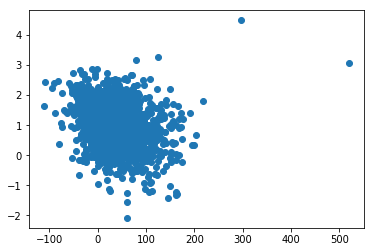

In [37]:
truncate_df = all_stocks_df#.loc[all_stocks_df['PE Ratio']<0.5]
plt.plot(truncate_df['Alpha'], truncate_df['Beta'],'o')

In [22]:
Counter(all_stocks_df['Sub-Sector'].values)

Counter({'Oil & Gas - Refining & Marketing': 7,
         'IT Services & Consulting': 65,
         'Private Banks': 22,
         'FMCG - Household Products': 3,
         'Home Financing': 11,
         'Telecom Services': 9,
         'Public Banks': 13,
         'Consumer Finance': 27,
         'Paints': 5,
         'Renewable Energy': 14,
         'Construction & Engineering': 91,
         'Retail - Department Stores': 7,
         'FMCG - Tobacco': 4,
         'Four Wheelers': 6,
         'Insurance': 9,
         'Power Infrastructure': 7,
         'Precious Metals, Jewellery & Watches': 24,
         'Oil & Gas - Exploration & Production': 5,
         'Cement': 37,
         'Gas Distribution': 7,
         'Pharmaceuticals': 91,
         'Commodities Trading': 13,
         'FMCG - Foods': 19,
         'Power Transmission & Distribution': 8,
         'Iron & Steel': 73,
         'Ports': 2,
         'Mining - Diversified': 5,
         'Diversified Chemicals': 15,
         'Power Generatio

In [23]:
subsector = 'Electrical Components & Equipments'
companies = all_stocks_df.loc[all_stocks_df['Sub-Sector']==subsector, 'Ticker'].values
names = all_stocks_df.loc[all_stocks_df['Sub-Sector']==subsector, 'Name'].values
print(names)

['Havells India Ltd' 'Polycab India Ltd' 'Graphite India Ltd'
 'V Guard Industries Ltd' 'HEG Ltd' 'Olectra Greentech Ltd'
 'Apar Industries Ltd' 'Precision Wires India Ltd'
 'HPL Electric & Power Ltd' 'Marine Electricals (India) Ltd'
 'Swelect Energy Systems Ltd' 'Hind Rectifiers Ltd'
 'Salzer Electronics Ltd' 'Modison Metals Ltd' 'De Nora India Ltd'
 'VETO Switch Gears And Cables Ltd' 'Servotech Power Systems Ltd'
 'MIC Electronics Ltd' 'Bhagyanagar India Ltd' 'Sarthak Metals Ltd'
 'Ice Make Refrigeration Ltd' 'V-Marc India Ltd'
 'Spectrum Electrical Industries Ltd' 'Uravi T & Wedge Lamps Ltd'
 'Diamond Power Infrastructure Ltd' 'HEC Infra Projects Ltd'
 'S & S Power Switchgear Ltd' 'Shri Ram Switchgears Ltd'
 'Lakshmi Electrical Control Systems Ltd']


 10%|████████▎                                                                          | 1/10 [00:00<00:04,  1.83it/s]

(267, 15)


 20%|████████████████▌                                                                  | 2/10 [00:01<00:05,  1.36it/s]

(267, 15)


 30%|████████████████████████▉                                                          | 3/10 [00:02<00:04,  1.40it/s]

(267, 15)


 40%|█████████████████████████████████▏                                                 | 4/10 [00:02<00:04,  1.48it/s]

(267, 15)


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:03<00:03,  1.59it/s]

(267, 15)


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.70it/s]

(145, 15)


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:04<00:01,  1.65it/s]

(267, 15)


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:05<00:01,  1.69it/s]

(267, 15)


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.58it/s]

(248, 15)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.51it/s]

(249, 15)


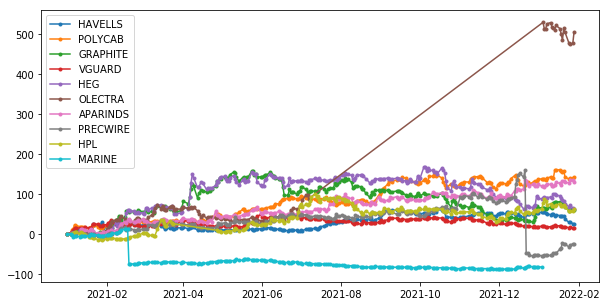

In [24]:
plt.figure(figsize=(10, 5))
for icomp in tqdm(companies[:10]):
    try:
        #data = get_history(symbol=icomp, start=date(prev_year, prev_month, prev_day), end=date(year, month, day))
        data = get_history(symbol=icomp, start=date(2021, 1, 1), end=date(year, month, day))
        data['perc_change'] = 100*(data['Close'] - data['Close'][0])/data['Close'][0]
        plt.plot(data['perc_change'], '.-', label=icomp)
        #print(icomp, min(data['Close']), max(data['Close']), )
        print(data.shape)
    except:
        pass
plt.legend()